In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
csv = pd.read_csv('/Users/jonniebarnsley/Downloads/results_optC.csv')
csv

,Unnamed: 0,name,aC,aPhi,iter,misfit,gradC,gradPhi,gradX0,gradX1
0,0,inv01,0.01,1.000000e+10,500,2.451240e+15,4.905820e+14,0,218017.0,0
1,1,inv02,0.05,1.000000e+10,500,2.448140e+15,3.099180e+14,0,243357.0,0
2,2,inv03,0.10,1.000000e+10,500,2.437080e+15,2.218760e+14,0,266308.0,0
3,3,inv04,0.50,1.000000e+10,500,2.439160e+15,8.281190e+13,0,437987.0,0
4,4,inv05,1.00,1.000000e+10,500,2.454280e+15,5.588520e+13,0,476321.0,0
5,5,inv06,5.00,1.000000e+10,500,2.616400e+15,2.787770e+13,0,790960.0,0
6,6,inv07,10.00,1.000000e+10,500,2.511960e+15,1.003280e+13,0,841315.0,0
7,7,inv08,50.00,1.000000e+10,491,2.700790e+15,6.070090e+12,0,1444210.0,0
8,8,inv09,100.00,1.000000e+10,470,2.871140e+15,4.233400e+12,0,3264550.0,0


/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_38016/3933175779.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Cruns['misfit'][8], Cruns['gradC'][8], c='yellow', cmap='viridis', s=50, edgecolor='black', zorder=2)


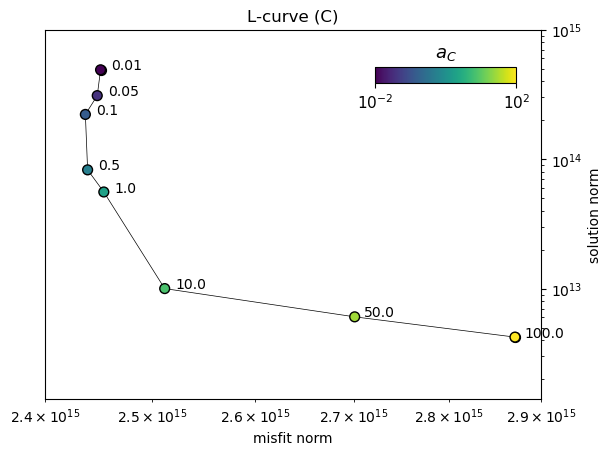

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable

Cruns = csv
Cruns = Cruns.drop(5)
plt.plot(Cruns['misfit'], Cruns['gradC'], c='black', lw=0.5, zorder=1)
plt.scatter(Cruns['misfit'][8], Cruns['gradC'][8], c='yellow', cmap='viridis', s=50, edgecolor='black', zorder=2)
plt.scatter(Cruns['misfit'][0], Cruns['gradC'][0], c=0, cmap='viridis', s=50, edgecolor='black', zorder=2)
plt.scatter(Cruns['misfit'], Cruns['gradC'], c=range(len(Cruns)), cmap='viridis', s=50, edgecolor='black', zorder=2)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")

plt.xlim(2.4e15, 2.9e15)
plt.ylim(1.4e12, 1e15)

for i, label in list(zip(Cruns.index, Cruns['aC'])):
    x = Cruns['misfit'][i] + 1e13
    y = Cruns['gradC'][i]
    plt.text(x, y, label)

plt.title('L-curve (C)')
# for i, label in [list(zip(Cruns.index, Cruns['aC']))[0]]:
#     x = Cruns['misfit'][i] + 1e13
#     y = Cruns['gradC'][i]
#     plt.text(x, y, label)

#plt.xlabel('$\|\ u-u_{obs}\ \|^2_2$', size=12)
#plt.ylabel('$\|\ \\nabla C \ \|^2_2$', size=12)

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.yscale('log')
plt.xscale('log')
ax = plt.gca()
cax = inset_axes(ax,
                 width="30%",  # width relative to parent_axes
                 height="5%",  # height in percent
                 loc='upper right',  # location
                 bbox_to_anchor=(0, 0, 0.95, 0.9),  # full axes
                 bbox_transform=ax.transAxes,
                 borderpad=0)

cbar = plt.colorbar(
    mappable = ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1e-2, vmax=1e2)),
    cax=cax, orientation='horizontal', ticks=[1e-2, 1e2], pad=2)
cax.xaxis.set_label_position('top')
cax.tick_params(labelsize=11)
cbar.set_label(label='$a_C$',size=13, labelpad=7)

#plt.suptitle('L-curve (C)')



#plt.savefig('/Users/jonniebarnsley/Downloads/gradC.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'L-curve ($\\phi$)')

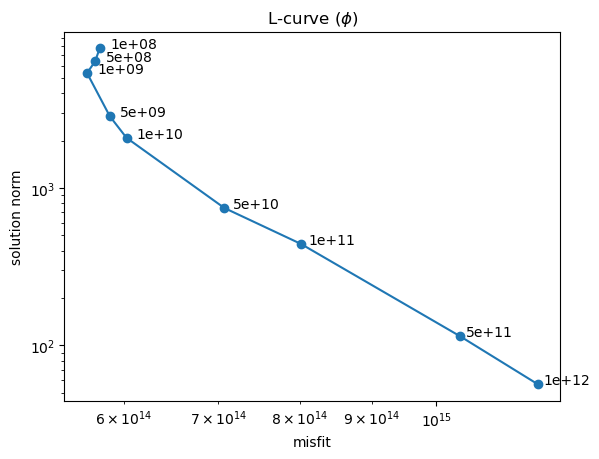

In [12]:
Phiruns = pd.read_csv('/Users/jonniebarnsley/Downloads/results_optPhi.csv')
#Phiruns = Phiruns.drop(7)

fig, ax = plt.subplots()

ax.plot(Phiruns['misfit'], Phiruns['gradPhi'])
ax.scatter(Phiruns['misfit'], Phiruns['gradPhi'])

for i, label in zip(Phiruns.index, Phiruns['aPhi']):
    x = Phiruns['misfit'][i] + 1e13
    y = Phiruns['gradPhi'][i]
    ax.text(x, y, f'{label:.0e}')

ax.set_xlabel('misfit')
ax.set_ylabel('solution norm')
ax.set_yscale('log')
ax.set_xscale('log')

plt.title('L-curve ($\phi$)')

In [5]:
Phiruns

,Unnamed: 0,name,aC,aPhi,iter,misfit,gradC,gradPhi,gradX0,gradX1
0,0,inv10,1.0,1.000000e+08,300,5.765680e+14,1.003520e+13,7743.5200,0,82476.900
1,1,inv11,1.0,5.000000e+08,300,5.722420e+14,1.003520e+13,6392.7800,0,83673.500
2,2,inv12,1.0,1.000000e+09,300,5.647270e+14,1.003520e+13,5392.8800,0,131184.000
3,3,inv13,1.0,5.000000e+09,300,5.862200e+14,1.003520e+13,2861.0600,0,60843.200
4,4,inv14,1.0,1.000000e+10,300,6.024020e+14,1.003520e+13,2088.3200,0,52645.700
5,5,inv15,1.0,5.000000e+10,300,7.068900e+14,1.003520e+13,747.4540,0,16757.000
6,6,inv16,1.0,1.000000e+11,302,8.013410e+14,1.003520e+13,441.2390,0,9423.430
7,7,inv17,1.0,5.000000e+11,300,1.039620e+15,1.003520e+13,114.0920,0,1751.320
8,8,inv18,1.0,1.000000e+12,300,1.180500e+15,1.003520e+13,56.4838,0,581.104


In [6]:
import re
with open('/Users/jonniebarnsley/Downloads/outer.txt') as f:
    outer = f.read()

misfit = list(map(float, re.findall(r"\|\|\s*velocity misfit\s*\|\|\^2\s*=\s*([\d\.e+-]+)", outer)))
gradC = list(map(float, re.findall(r"\|\|\s*grad C\s*\|\|\^2\s*=\s*([\d\.e+-]+)", outer)))
gradPhi = list(map(float, re.findall(r"\|\|\s*grad muCoef\s*\|\|\^2\s*=\s*([\d\.e+-]+)", outer)))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jonniebarnsley/Downloads/outer.txt'

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(misfit, gradC, c=range(len(misfit)), cmap='viridis', alpha=0.5)
plt.xscale('log')
plt.yscale('log')

for iter in np.arange(0, 550, 50):
    x = misfit[iter]
    y = gradC[iter]
    plt.text(x+1e14, y, str(iter))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')
plt.title('L-curve ($C$)')

NameError: name 'misfit' is not defined

In [8]:
plt.scatter(misfit, gradPhi, c=range(len(misfit)), cmap='viridis', alpha=0.5)
plt.xscale('log')
plt.yscale('log')

# for iter in np.arange(0, 550, 50):
#     x = misfit[iter]
#     y = gradPhi[iter]
#     plt.text(x, y, str(iter))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')
plt.title('L-curve ($\Phi$)')

NameError: name 'misfit' is not defined

In [9]:
optC = pd.read_csv('/Users/jonniebarnsley/Downloads/L_curves.csv')
optC

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jonniebarnsley/Downloads/L_curves.csv'

In [10]:
plt.scatter(optC['misfit'], optC['gradC'], c=range(len(optC)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in optC.iterrows():
    plt.text(row['misfit']+1e13, row['gradC'], str(row['aC']))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($C$), $n=3$')

NameError: name 'optC' is not defined

Text(0.5, 1.0, 'L-curve ($\\Phi$), $n=3$')

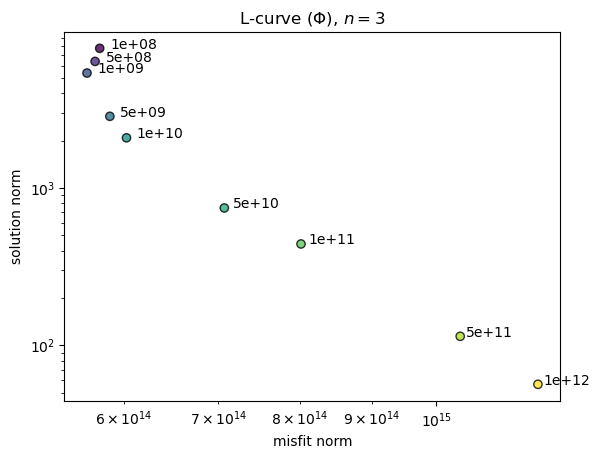

In [11]:
optPhi = pd.read_csv('/Users/jonniebarnsley/Downloads/results_optPhi.csv')
plt.scatter(optPhi['misfit'], optPhi['gradPhi'], c=range(len(optPhi)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in optPhi.iterrows():

    plt.text(row['misfit']+1e13, row['gradPhi'], f"{row['aPhi']:.0e}")

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($\Phi$), $n=3$')

In [12]:
glens2_optC = pd.read_csv('/Users/jonniebarnsley/Downloads/results_glens2_optC.csv')
plt.scatter(glens2_optC['misfit'], glens2_optC['gradC'], c=range(len(glens2_optC)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in glens2_optC.iterrows():
    plt.text(row['misfit']+1e13, row['gradC'], str(row['aC']))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($C$), $n=2$')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jonniebarnsley/Downloads/results_glens2_optC.csv'

Text(0.5, 1.0, 'L-curve ($C$), $n=4$')

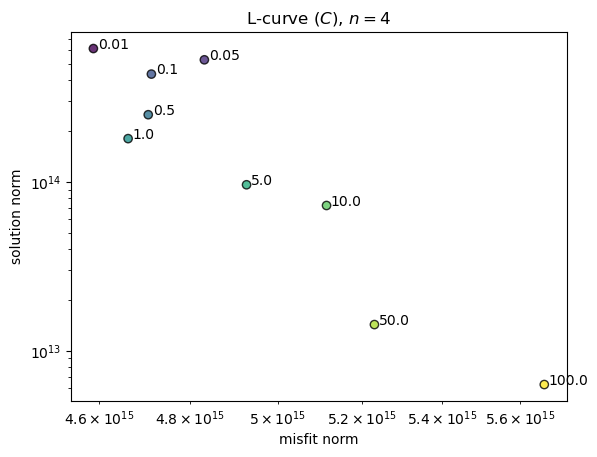

In [5]:
glens4_optC = pd.read_csv('/Users/jonniebarnsley/Downloads/results_glens4_optC.csv')
plt.scatter(glens4_optC['misfit'], glens4_optC['gradC'], c=range(len(glens4_optC)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in glens4_optC.iterrows():
    plt.text(row['misfit']+1e13, row['gradC'], str(row['aC']))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($C$), $n=4$')